In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install fastai

In [ ]:

import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

In [ ]:

vgg16 = Sequential()

In [ ]:
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
                 input_shape=(150, 150, 3)))
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Flatten())

vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))
# the data we are using has 3 classes
vgg16.add(Dense(6, activation='softmax'))

In [ ]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0

In [ ]:
# necessary imports
import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

In [ ]:
# A function to load data from a given directory
def load_data(data_dir):
  data = []
  labels = []
  class_dirs = os.listdir(data_dir)
  
  for direc in class_dirs:
    class_dir = os.path.join(data_dir, direc)
    for imagepath in tqdm(list(paths.list_images(class_dir))):
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (150, 150))  # incase images not of same size
      data.append(image)
      labels.append(direc)
  # normalizing and converting to numpy array format
  data = np.array(data, dtype='float')/255.0
  labels = np.array(labels)
  return data, labels

In [ ]:
#unzip dataset in colab session
# !pip install pyunpack
# !pip install patool
# from pyunpack import Archive
# Archive("/content/intel-image-classification-mini-20210103T223223Z-001.zip").extractall("/content/sample_data")
#!unzip -q  intel-image-classification-mini-20210103T223223Z-001.zip # -q for quiet

train_dir = "/content/intel-image-classification-mini/seg_train/"
test_dir = "/content/intel-image-classification-mini/seg_test/"
pred_dir = "/content/intel-image-classification-mini/seg_pred/"

# print('loading train images')
# X_train, y_train = load_data(train_dir)
print('loading test images')
X_test, y_test = load_data(test_dir)

 10%|█         | 51/510 [00:00<00:00, 509.00it/s]

loading test images


100%|██████████| 553/553 [00:00<00:00, 1204.02it/s]


In [ ]:
X_train.shape

(7016, 150, 150, 3)

In [ ]:
X_test.shape

(3000, 150, 150, 3)

In [ ]:
lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
y_train[0]

array([0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train,
                                                        test_size=0.2,
                                                        random_state=42)

In [ ]:

from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
vgg16.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
H = vgg16.fit(X_train, y_train, batch_size=64,
              epochs=50, 
              validation_data=(X_valid, y_valid))

Epoch 1/50
88/88 [==============================] - 54s 492ms/step - loss: 1.7917 - accuracy: 0.1811 - val_loss: 1.7913 - val_accuracy: 0.1809
Epoch 2/50
88/88 [==============================] - 40s 457ms/step - loss: 1.7914 - accuracy: 0.1740 - val_loss: 1.7909 - val_accuracy: 0.1809
Epoch 3/50
88/88 [==============================] - 40s 451ms/step - loss: 1.7914 - accuracy: 0.1705 - val_loss: 1.7907 - val_accuracy: 0.1809
Epoch 4/50
88/88 [==============================] - 40s 454ms/step - loss: 1.7911 - accuracy: 0.1732 - val_loss: 1.7906 - val_accuracy: 0.1809
Epoch 5/50
88/88 [==============================] - 40s 454ms/step - loss: 1.7901 - accuracy: 0.1843 - val_loss: 1.7904 - val_accuracy: 0.1809
Epoch 6/50
88/88 [==============================] - 40s 452ms/step - loss: 1.7904 - accuracy: 0.1731 - val_loss: 1.7904 - val_accuracy: 0.1809
Epoch 7/50
88/88 [==============================] - 40s 454ms/step - loss: 1.7895 - accuracy: 0.1843 - val_loss: 1.7903 - val_accuracy: 0.1809

In [ ]:
# save the model's trained weights
vgg16.save_weights('vgg16_trained1_wts.h5')

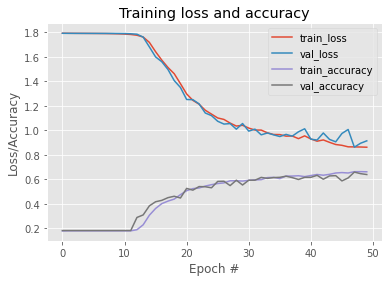

In [ ]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
score = vgg16.evaluate(X_test, y_test, batch_size=64)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

47/47 [==============================] - 8s 163ms/step - loss: 0.9084 - accuracy: 0.6443
Test Loss =  0.9083946347236633
Test Accuracy =  0.6443333625793457


In [ ]:
'''CONFUSION MATRIX'''
# Making prediction
y_pred = vgg16.predict_classes(X_test)
y_true = np.argmax(y_test, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
confusion_mtx

array([[230,  16,  32,  52,  24,  83],
       [ 15, 378,   4,   5,   0,  72],
       [  5,   2, 306,  63, 164,  13],
       [ 19,   1,  52, 332, 114,   7],
       [ 13,   3, 134,  75, 282,   3],
       [ 40,  10,  34,   8,   4, 405]])

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:

# load VGG16 model without classification layers
model = VGG16(include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# add new classification layers
flat1 = Flatten()(model.layers[-1].output) # flatten last layer
class1 = Dense(1024, activation='relu')(flat1) # add FC layer on previous layer
output = Dense(6, activation='softmax')(class1) # add softmax layer

In [ ]:
# define the new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train,
                                                        test_size=0.2,
                                                        random_state=42)

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
H = model.fit(X_train, y_train, batch_size=128,
              epochs=15, 
              validation_data=(X_valid, y_valid))

Epoch 1/15
44/44 [==============================] - 63s 1s/step - loss: 1.2066 - accuracy: 0.5203 - val_loss: 0.3538 - val_accuracy: 0.8718
Epoch 2/15
44/44 [==============================] - 40s 905ms/step - loss: 0.3110 - accuracy: 0.8929 - val_loss: 0.3019 - val_accuracy: 0.8910
Epoch 3/15
44/44 [==============================] - 40s 914ms/step - loss: 0.2301 - accuracy: 0.9203 - val_loss: 0.2676 - val_accuracy: 0.9110
Epoch 4/15
44/44 [==============================] - 40s 906ms/step - loss: 0.1447 - accuracy: 0.9500 - val_loss: 0.3238 - val_accuracy: 0.8903
Epoch 5/15
44/44 [==============================] - 40s 911ms/step - loss: 0.1264 - accuracy: 0.9518 - val_loss: 0.2528 - val_accuracy: 0.9131
Epoch 6/15
44/44 [==============================] - 40s 912ms/step - loss: 0.0780 - accuracy: 0.9778 - val_loss: 0.2743 - val_accuracy: 0.9103
Epoch 7/15
44/44 [==============================] - 40s 912ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.3213 - val_accuracy: 0.8989
Ep

In [ ]:

# save the model's trained weights
model.save_weights('vgg_transfer_trained_wts.h5')

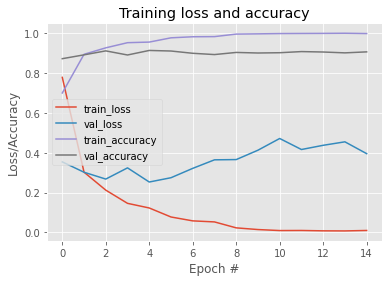

In [ ]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 15)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=64)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

47/47 [==============================] - 10s 174ms/step - loss: 0.3583 - accuracy: 0.9077
Test Loss =  0.35830366611480713
Test Accuracy =  0.9076666831970215


In [ ]:
'''CONFUSION MATRIX'''
# Making prediction
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

In [ ]:
confusion_mtx

array([[394,   1,   1,   0,   5,  36],
       [  0, 468,   2,   1,   2,   1],
       [  2,   2, 473,  60,  16,   0],
       [  0,   5,  54, 452,  12,   2],
       [  2,   1,  12,  10, 485,   0],
       [ 40,   2,   1,   2,   5, 451]])